# 1.1 Shuttle Dispatching Problem
K = the capacity of a shuttle if it is dispatched  
At = a random variable giving the number of customers arriving during the interval t  
cf = the cost of dispatching a shuttle  
ch = the cost per customer left waiting per time period  
  
Given, K = 15, cf = 100, ch = 2 and At = unif{1,5}  
Assume, maximum number of people at station = 200 and discount rate lambda = 0.95

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# a. Enumeration   
T=500

In [2]:
def enumeration(T,K,cf,ch,A,DF,N): 
    V = np.zeros(N+1)
    Vnext = np.zeros(N+1)
    for _ in range(T,-1,-1):
        for p in range(N+1):
            Vo0 = -ch * p
            Vo1 = -cf - ch *(p - min(p,K))
            for a in range(1,A+1):
                Vo0 += (1/A) * DF *Vnext[min(p+a,N)] 
                Vo1 += (1/A) * DF * Vnext[(p+a) - min((p+a),K)]
            V[p] = max(Vo0, Vo1)
        Vnext = V
    return V

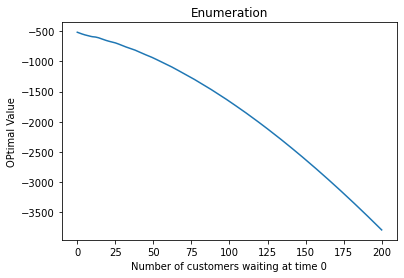

In [3]:
K = 15 # Capacity of shuttle
cf = 100
ch = 2
A = 5 # maximum number of customers arriving at time t
DF = 0.95 # discount factor
N = 200 # Maximum number of people at a station is 200
T = 500
V = enumeration(T,K,cf, ch, A,DF,N)

plt.figure()
plt.plot(V)
plt.xlabel('Number of customers waiting at time 0')
plt.ylabel('OPtimal Value')
plt.title('Enumeration')
plt.savefig('1_enumeration.png',bbox_inches='tight',facecolor="#FFFFFF")
plt.show()

# b. Value Iteration  
T=infinity

In [4]:
def value_iteration(K,cf,ch,A,DF,N): 
    threshold  = 0.01
    Vinit = np.zeros(N+1)
    while True:
        V = Vinit.copy()
        delta = 0
        for p in range(N+1):
            Vo0 = -ch * p
            Vo1 = -cf - ch *(p - min(p,K))
            for a in range(1,A+1):
                Vo0 += (1/A) * DF *V[min(p+a,N)] 
                Vo1 += (1/A) * DF * V[(p+a) - min((p+a),K)]
            V[p] = max(Vo0, Vo1)
        delta = max(delta, max(abs(V-Vinit)))
        if delta < threshold:
            return Vinit
            break

In [5]:
K = 15 # Capacity of shuttle
cf = 100
ch = 2
A = 5 # maximum number of customers arriving at time t
DF = 0.95 # discount factor
N = 200
V = value_iteration(K,cf,ch,A,DF,N)

plt.figure()
plt.plot(V)
plt.xlabel('Number of customers waiting')
plt.ylabel('OPtimal Value')
plt.title('Value Iteration')
plt.savefig('1_value_iteration.png',bbox_inches='tight',facecolor="#FFFFFF")
plt.show()

KeyboardInterrupt: 

# c. Policy Iteration

In [ ]:
def policy_iteration(K,cf,ch,A,DF,N): 
    threshold  = 0.01
    Vinit = np.zeros(N+1)
    V = Vinit.copy
    actions = [0,1]
    policy = np.zeros(N+1)
    actions.remove(0)
    policy_next = np.array([a[0]]*201)
    deltainit = 100
    delta = deltainit

    flag = True
    while flag:

        while threshold < delta:
            V = Vinit.copy()
            for p in range(N+1):
                delta = 0
                v = Vinit[p]
                Vo0 = -ch * p
                Vo1 = -cf - ch *(p - min(p,K))
                for a in range(1,A+1):
                    Vo0 += (1/A) * DF *V[min(p+a,N)] 
                    Vo1 += (1/A) * DF * V[(p+a) - min((p+a),K)]
                value = [Vo0, Vo1]
                Vinit[p] = value[policy[p]]
                delta = max(delta, abs(v-Vinit[p]))

        for p in range(N+1):
            Vo0 = -ch * p
            Vo1 = -cf - ch *(p - min(p,K))
            for a in range(1,A+1):
                Vo0 += (1/A) * DF *V[min(p+a,N)] 
                Vo1 += (1/A) * DF * V[(p+a) - min((p+a),K)]
            value = [Vo0, Vo1]
            policy_next[p] = np.argmax(value)
    
        if sum(policy -policy_next) == 0:
            flag = False
        else:
            delta = deltainit
            policy = plicy_next.copy()
        
    return policy


In [ ]:
K = 15 # Capacity of shuttle
cf = 100
ch = 2
A = 5 # maximum number of customers arriving at time t
DF = 0.95 # discount factor
N = 200
V = policy_iteration(K,cf,ch,A,DF,N)

plt.figure()
plt.plot(V)
plt.xlabel('Number of customers waiting')
plt.ylabel('Optimal Policy')
plt.title('Policy Iteration')
plt.savefig('1_Policy_iteration.png',bbox_inches='tight',facecolor="#FFFFFF")
plt.show()